# Prediksi Harga Mobil


## Business Understanding.

### Domain proyek
Domain yang saya pilih pada proyek ini adalah **Bisnis Otomotif**.
- Persaingan di sektor industri makin tahun makin ketat dan kompetitif, sehingga perusahaan-perusahaan secara tidak langusng dituntut untuk terus berkreasi dan berinovasi dalam menawarkan produk atau jasa yang akan dijualnya
agar setiap perusahaan, baik yang menawarkan produk ataupun jasa mempunyai tujuan untuk tetap hidup dan berkembang. Ataupun konsumen yang sudah dimiliki perusahaan tidak berpindah ke produk lain dan untuk menarik konsumen baru untuk
mengonsumsi produk yang sudah dihasilkan suatu perusahaan. Seiring dengan ide tersebut konsep pemasaran pun turut berkembang. Kegiatan pemasaran sekarang sudah difokuskan pada pemuasan kebutuhan konsumen. Pemasaran itu sendiri, masalah yang harus diselesaikan adalah bagaimana caranya produk mobil tersebut dapat bersaing didunia pasar, serta dapat memprediksi harga dari produk tersebut.

Hasil riset terkait dapat dilihat dari tautan berikut:

- [tautan](http://repository.unpas.ac.id/41755/4/7.%20BAB%201.pdf)


### Problem Statements

1. Bagaimana agar penjualan mobil tidak menurun ?
2. Bagaimana agar konsumen dapat tertarik untuk membeli mobil ?

### Goals

Membuat prediksi harga mobil agar para pembeli dapat dengan mudah memperhitungkan harga mobil pada masa mendatang

### Solution statements

Solution Statements yang akan dilakukan adalah dengan menerapkan 3 algoritma Machine Learning yaitu :

- **Random Forest**.<br>
  Algoritma random forest adalah salah satu algoritma supervised learning. Dia dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Random forest juga merupakan algoritma yang sering digunakan karena cukup sederhana tetapi memiliki stabilitas yang mumpuni.
- **Boosting Algorithm**.<br>
  Algoritma boosting bekerja dengan membangun model dari data latih. Kemudian Dia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan.
- **K-Nearest Neighbor**.<br>
  KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.



pertama kali yang dilakukan yaitu import seluruh library yang akan digunakan

In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

## Data Understanding

Data atau dataset yang digunakan pada proyek machine learning ini adalah data **100,000 UK Used Car Data set** yang didapat dari situs kaggle. Link dataset dapat dilihat dari tautan berikut [vw.csv](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=vw.csv)

Variabel-variabel pada House Sales in King County, USA dataset adalah sebagai berikut :

- model : merupakan daftar model yang ada pada mobil Volkswagen.
- year : merupakan daftar tahun dirilisnya model mobil.
- Price : merupakan daftar harga dari mobil (dalam satuan euro).
- transmission : merupakan daftar transmission pada mobil .
- mileage : merupakan daftar jarak tempuh yang dapat dilalui.
- fuelType : merupakan daftar tipe bahan bakar yang digunakan.
- tax : merupakan daftar pajak
- mpg : merupakan daftar efesiensi bahan bakar.
- engineSize : merupakan daftar kapasistas mesin.


membuat path yang isinya merupakan alamat(path) tempat file csv atau dataset berada.

In [340]:
path = 'vw.csv'
car = pd.read_csv(path)
car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


Cek tipe data yang digunakan pada setiap kolom

In [341]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


Dari data diatas dapat disimpulkan bahwa terdapat 6 data numerik yang terdiri dari column :
- year
- price
- mileage
- tax
- mpg
- engineSize

serta 3 data kategirik yang terdiri dari column :
- model
- transmission
- fuelType


Mengecek deskripsi statistik data car vw

In [342]:
car.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


## Data Preparation

Data preparation yang digunakan oleh saya yaitu :

- Seleksi data : menyeleksi data apakah data tersebut ada yang kosong atau tidak, jika ada data kosong maka saya akan.menghapusnya
- Membagi data menjadi data training dan test : untuk membagi data untuk dilatih dan tes.

cek apakah ada data yang nilainya 0

In [343]:
mileage =(car.mileage == 0).sum()
mpg =(car.mpg == 0).sum()
engineSize =(car.engineSize == 0).sum()


print('nilai 0 pada kolom mileage ada : ', mileage)
print('nilai 0 pada kolom mpg ada : ', mpg)
print('nilai 0 pada kolom engineSize ada : ', engineSize)


nilai 0 pada kolom mileage ada :  0
nilai 0 pada kolom mpg ada :  0
nilai 0 pada kolom engineSize ada :  15


Dari data diatas dapat dilihat bahwa kolom engineSize memilik data 0

cek apakah data bernilai 0 pada salah satu dimensi terdapat pada dimensi lain

In [344]:
car.loc[car['engineSize']==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
649,T-Roc,2019,22000,Automatic,2009,Petrol,145,39.8,0.0
664,T-Roc,2018,23000,Automatic,27327,Diesel,145,51.4,0.0
4734,Golf,2015,11800,Manual,36205,Diesel,20,68.9,0.0
4761,Golf,2019,18000,Manual,5073,Petrol,145,50.4,0.0
4768,Golf,2017,12600,Manual,20340,Diesel,0,74.3,0.0
6347,Passat,2018,17000,Manual,18169,Petrol,145,56.5,0.0
6351,Passat,2017,16000,Manual,13593,Diesel,150,68.9,0.0
6354,Passat,2018,19500,Automatic,22283,Petrol,145,48.7,0.0
6356,Passat,2019,18500,Automatic,11993,Petrol,145,41.5,0.0
11559,Tiguan,2017,19200,Manual,18002,Diesel,150,58.9,0.0


#### Drop baris dengan nilai 0 pada kolom engineSize, mpg, dam mileage

In [345]:
# drop nilai 0 pada kolom engineSize
car = car[car.engineSize != 0]
car.shape

(15142, 9)

In [346]:
# cek kembali nilai 0 pada kolom engineSize
engineSize =(car.engineSize == 0).sum()
print('nilai 0 pada kolom engineSize ada : ', engineSize)

nilai 0 pada kolom engineSize ada :  0


Cek kembali Deksripsi statistik data

In [347]:
car.describe()

,year,price,mileage,tax,mpg,engineSize
count,15142.000000,15142.000000,15142.000000,15142.000000,15142.000000,15142.000000
mean,2017.255581,16839.307951,22094.976423,112.747325,53.751255,1.602278
std,2.053780,7757.425458,21157.196269,63.488175,13.645342,0.459165
min,2000.000000,899.000000,1.000000,0.000000,0.300000,1.000000
25%,2016.000000,10990.000000,5952.000000,30.000000,46.300000,1.200000
50%,2017.000000,15495.000000,16367.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31831.750000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


### Menangani outliers

Memviusalisasikan car dengan bloxplot untuk mendeteksi ouliers pada numerik

Visualisasi bloxplot untuk column mileage

<Axes: xlabel='mileage'>

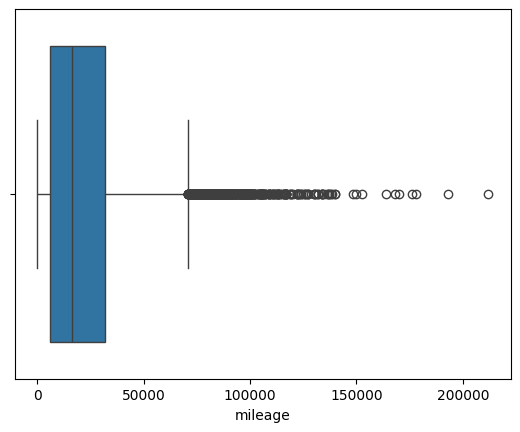

In [348]:
sns.boxplot(x=car['mileage'])

Visualisasi bloxplot untuk column tax

<Axes: xlabel='tax'>

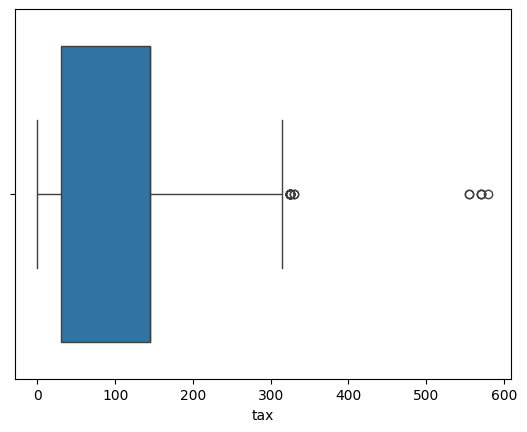

In [349]:
sns.boxplot(x=car['tax'])

Visualisasi bloxplot untuk column mpg

<Axes: xlabel='mpg'>

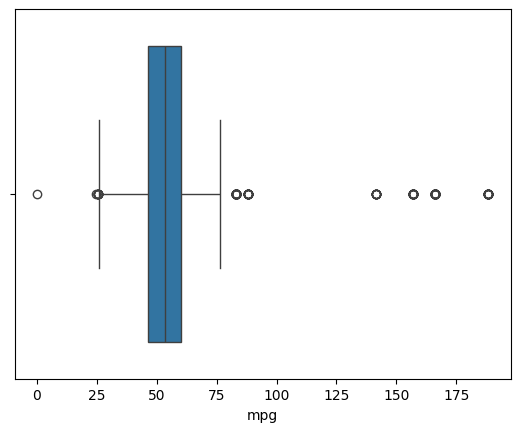

In [350]:
sns.boxplot(x=car['mpg'])

Visualisasi bloxplot untuk column engineSize

<Axes: xlabel='engineSize'>

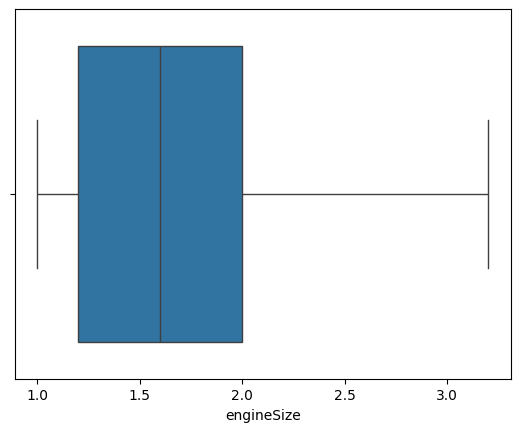

In [351]:
sns.boxplot(x=car['engineSize'])

Mengani outliers dengan persamaan:   
<i> Batas bawah = Q1 - 1.5 * IQR</i>    
<i> Batas atas = Q3 + 1.5 * IQR</i>

In [352]:
# tangani outlier dengan persamaan IQR
Q1 = car[numeric_cols].quantile(0.25)
Q3 = car[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Select only numeric columns for outlier handling
numeric_cols = car.select_dtypes(include=[np.number]).columns
car = car[~((car[numeric_cols] < (Q1 - 1.5 * IQR)) | (car[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
car.shape




(14060, 9)

Cek kembali apakah outliers sudah teratasi

<Axes: xlabel='mileage'>

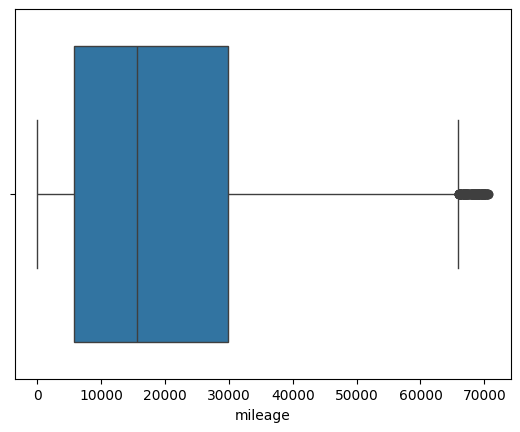

In [353]:
sns.boxplot(x=car['mileage'])

<Axes: xlabel='tax'>

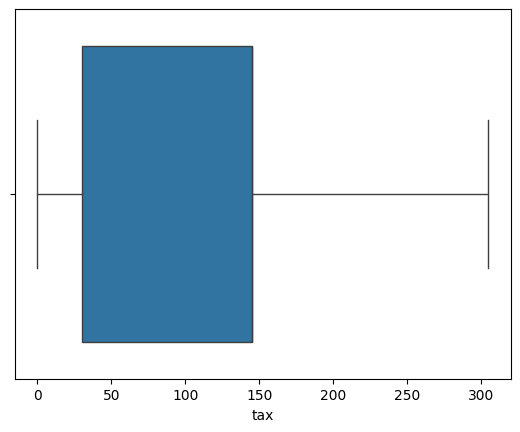

In [354]:
sns.boxplot(x=car['tax'])

<Axes: xlabel='mpg'>

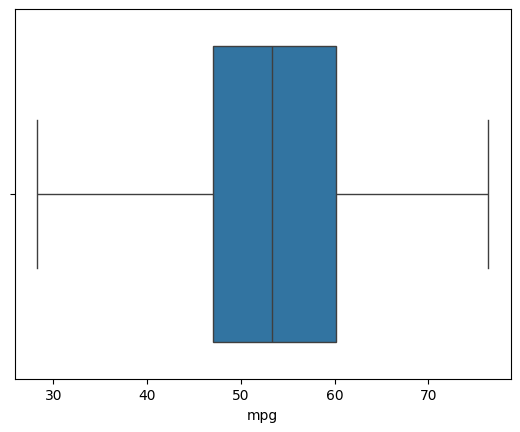

In [355]:
sns.boxplot(x=car['mpg'])

<Axes: xlabel='engineSize'>

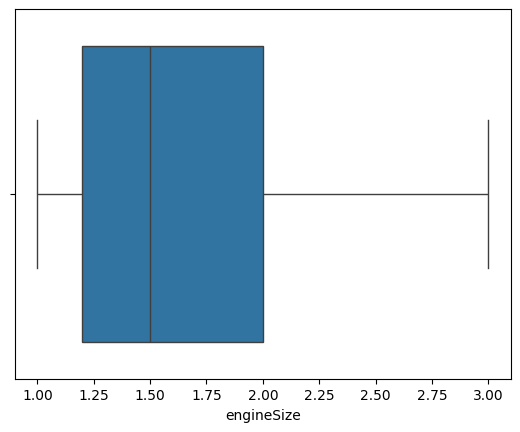

In [356]:
sns.boxplot(x=car['engineSize'])

Proses analisi data dengan teknik univariate EDA, dengan membagi fitur manjadi 2 yaotu numerik dan kategorikal

In [357]:
numerik = ['year','price','mileage','tax','mpg','engineSize']
kategorikal = ['model','transmission','fuelType']

### Analisis terhadap fitur kategori  

**FITUR MODEL**

                 jumlah sampel  persentase
model                                     
Golf                      4540        32.3
Polo                      3180        22.6
Tiguan                    1717        12.2
Up                         873         6.2
Passat                     749         5.3
T-Roc                      720         5.1
Touran                     331         2.4
T-Cross                    300         2.1
Golf SV                    264         1.9
Sharan                     252         1.8
Arteon                     246         1.7
Scirocco                   220         1.6
Touareg                    177         1.3
Amarok                      91         0.6
Tiguan Allspace             88         0.6
CC                          73         0.5
Beetle                      69         0.5
Shuttle                     59         0.4
Caddy Maxi Life             59         0.4
Jetta                       24         0.2
Caravelle                    9         0.1
Caddy Life 

<Axes: title={'center': 'model'}, xlabel='model'>

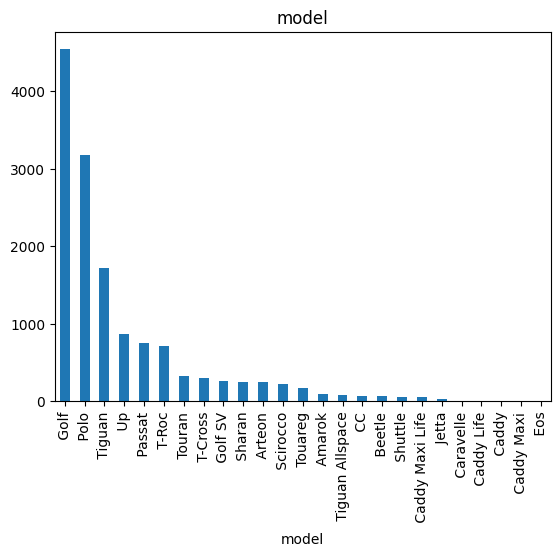

In [358]:
feature = kategorikal[0]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

**FITUR TRANSMISSION**

              jumlah sampel  persentase
transmission                           
Manual                 8867        63.1
Semi-Auto              3515        25.0
Automatic              1678        11.9


<Axes: title={'center': 'transmission'}, xlabel='transmission'>

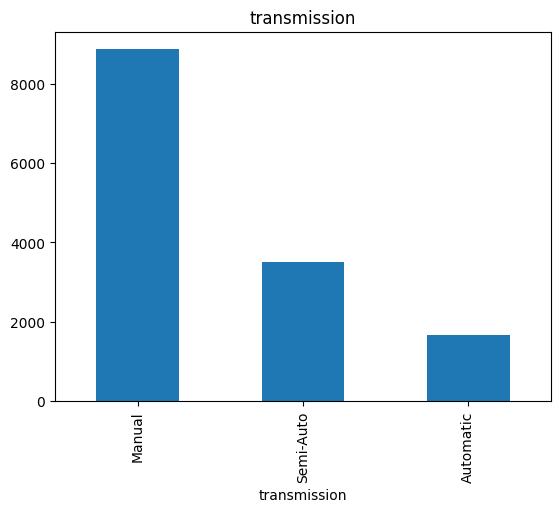

In [359]:
feature = kategorikal[1]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

**FITUR ENGINETYPE**

          jumlah sampel  persentase
fuelType                           
Petrol             8359        59.5
Diesel             5572        39.6
Other                77         0.5
Hybrid               52         0.4


<Axes: title={'center': 'fuelType'}, xlabel='fuelType'>

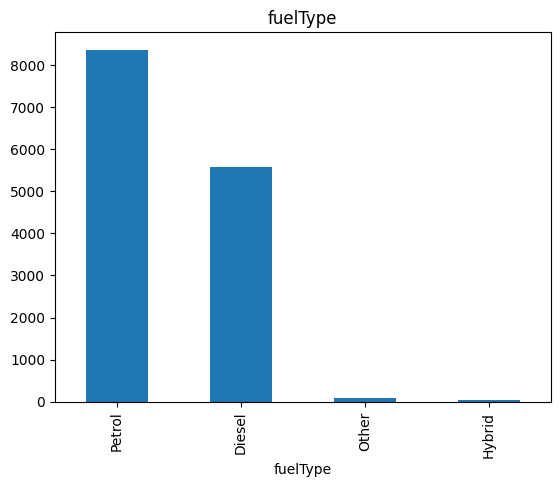

In [360]:
feature = kategorikal[2]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

### Numerikal
melihat histogram masing-masing fitur numerikal yaitu year, price, mileage, tax, mpg dan engineSize

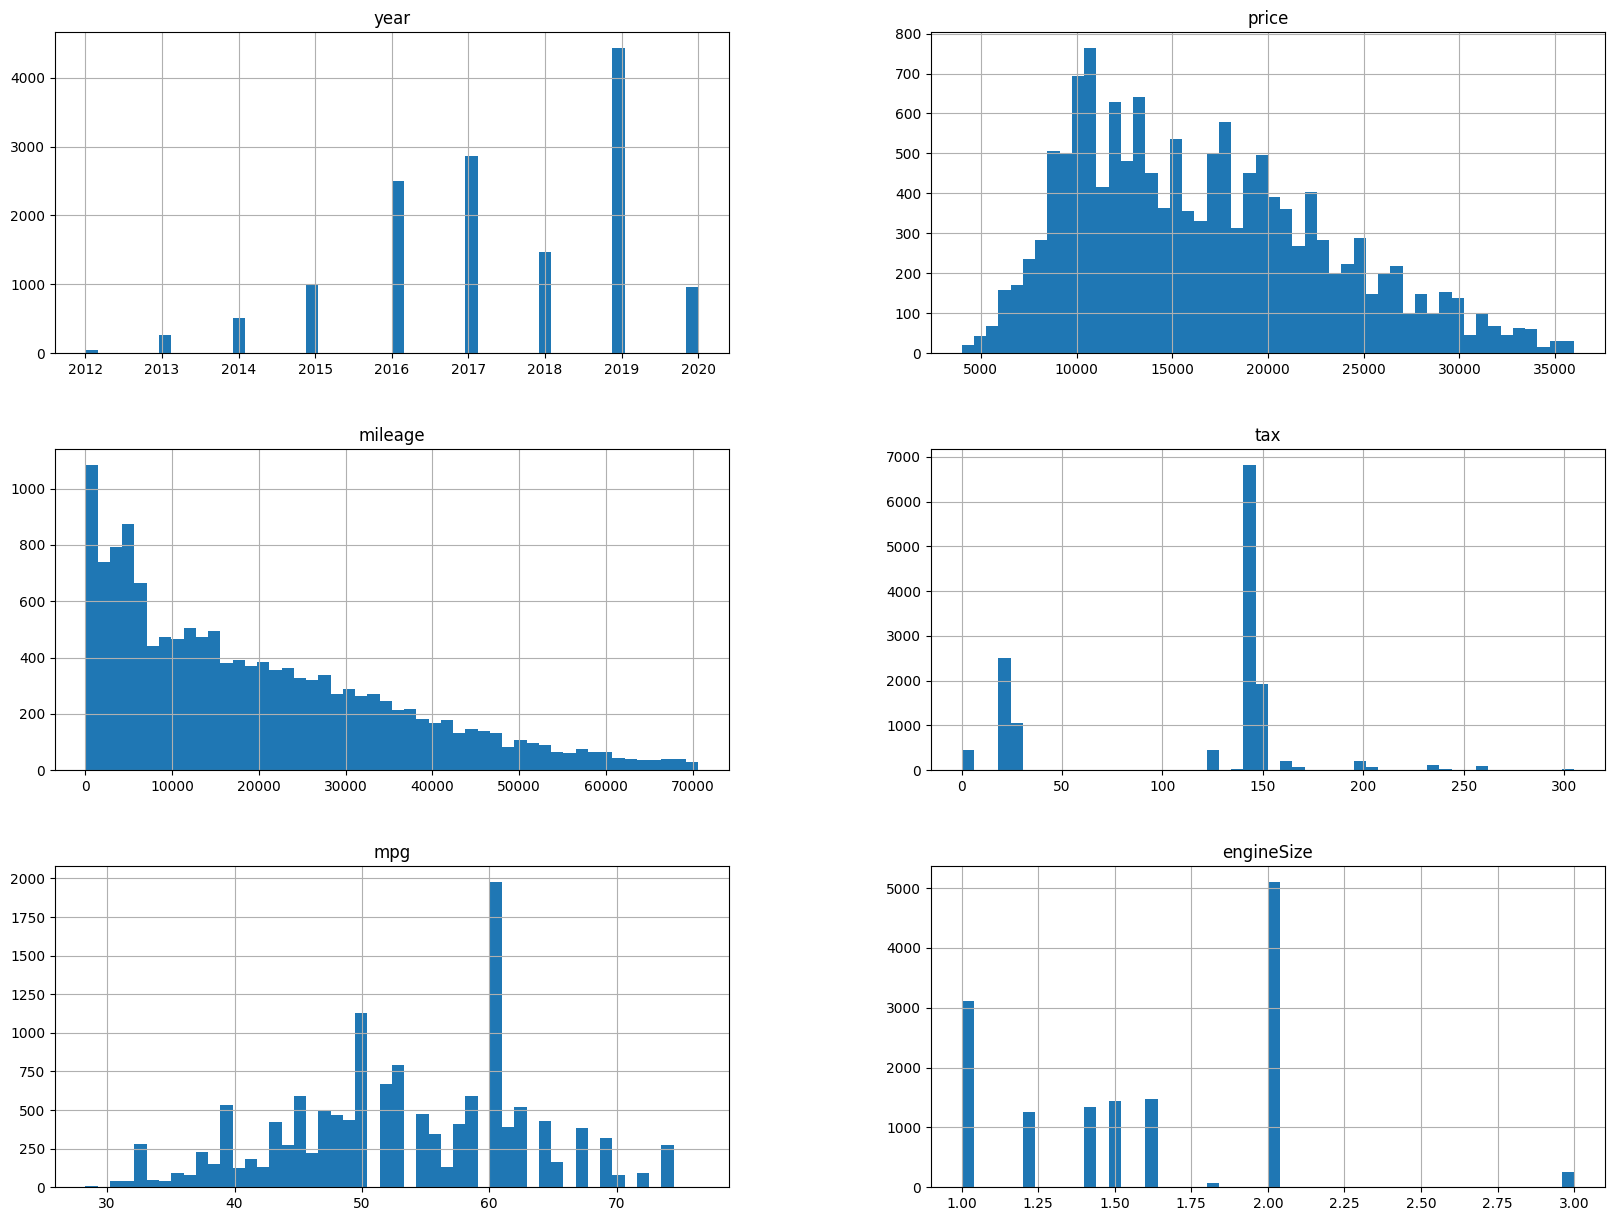

In [361]:
car.hist(bins=50, figsize=(20,15))
plt.show()

### Exploratory Data Analysis - Multivariate Analysis
melakukan analisis data pada fitur kategori dan numerik.

***KATEGORI***  
Mengecek rata-rata price terhadap masing-masing fitur untuk mengetahui pengaruh fitur terhadap price

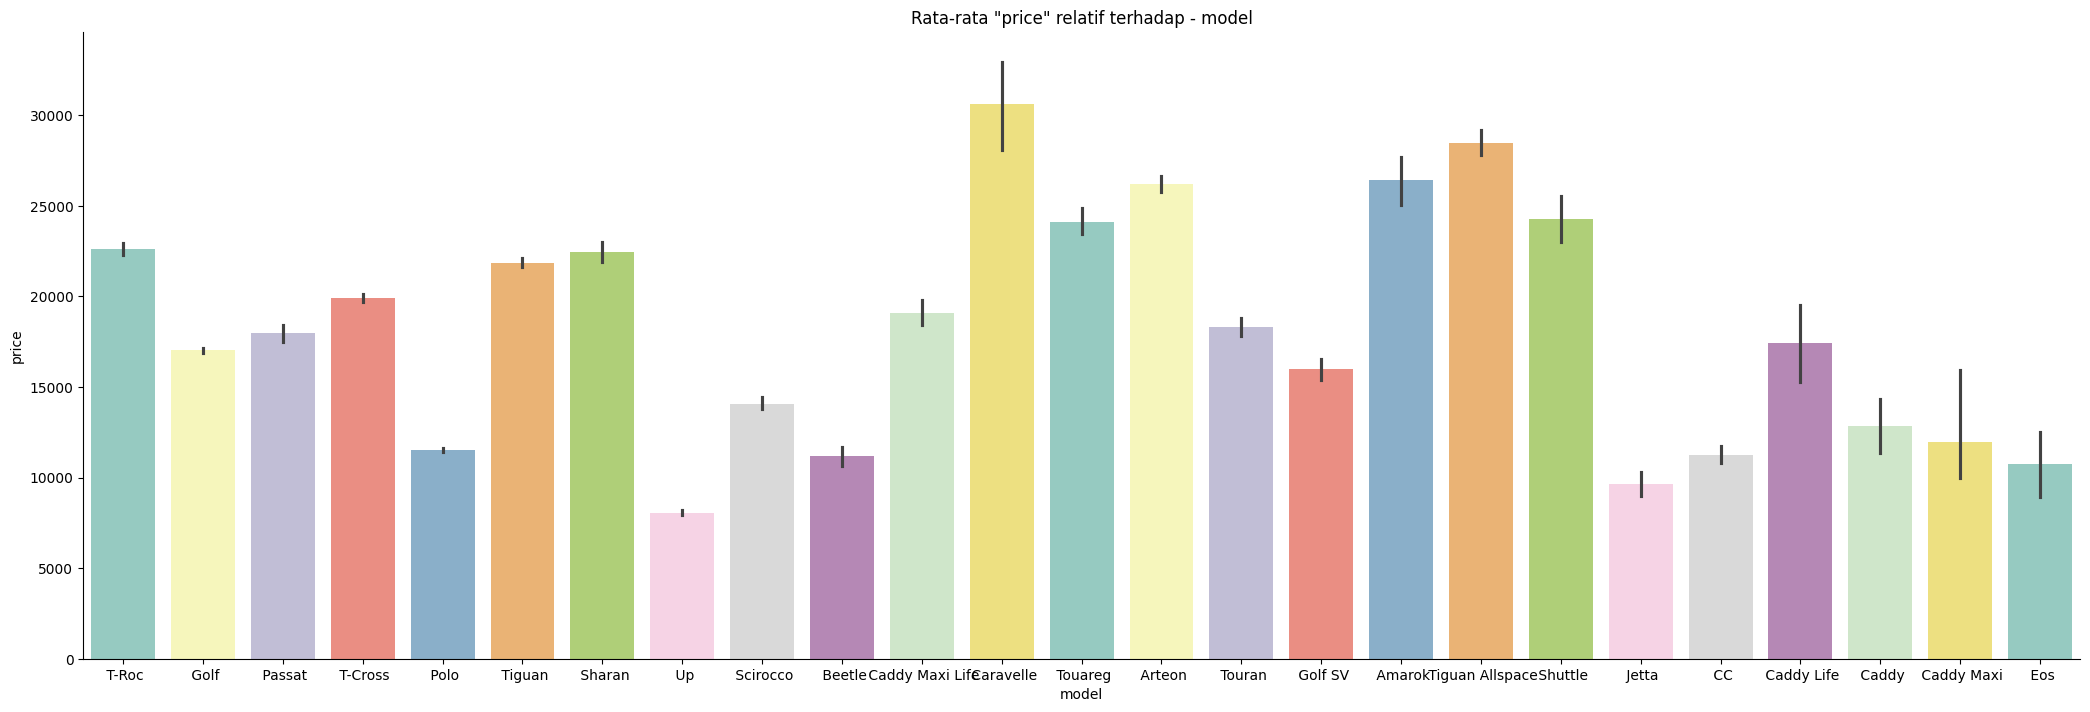

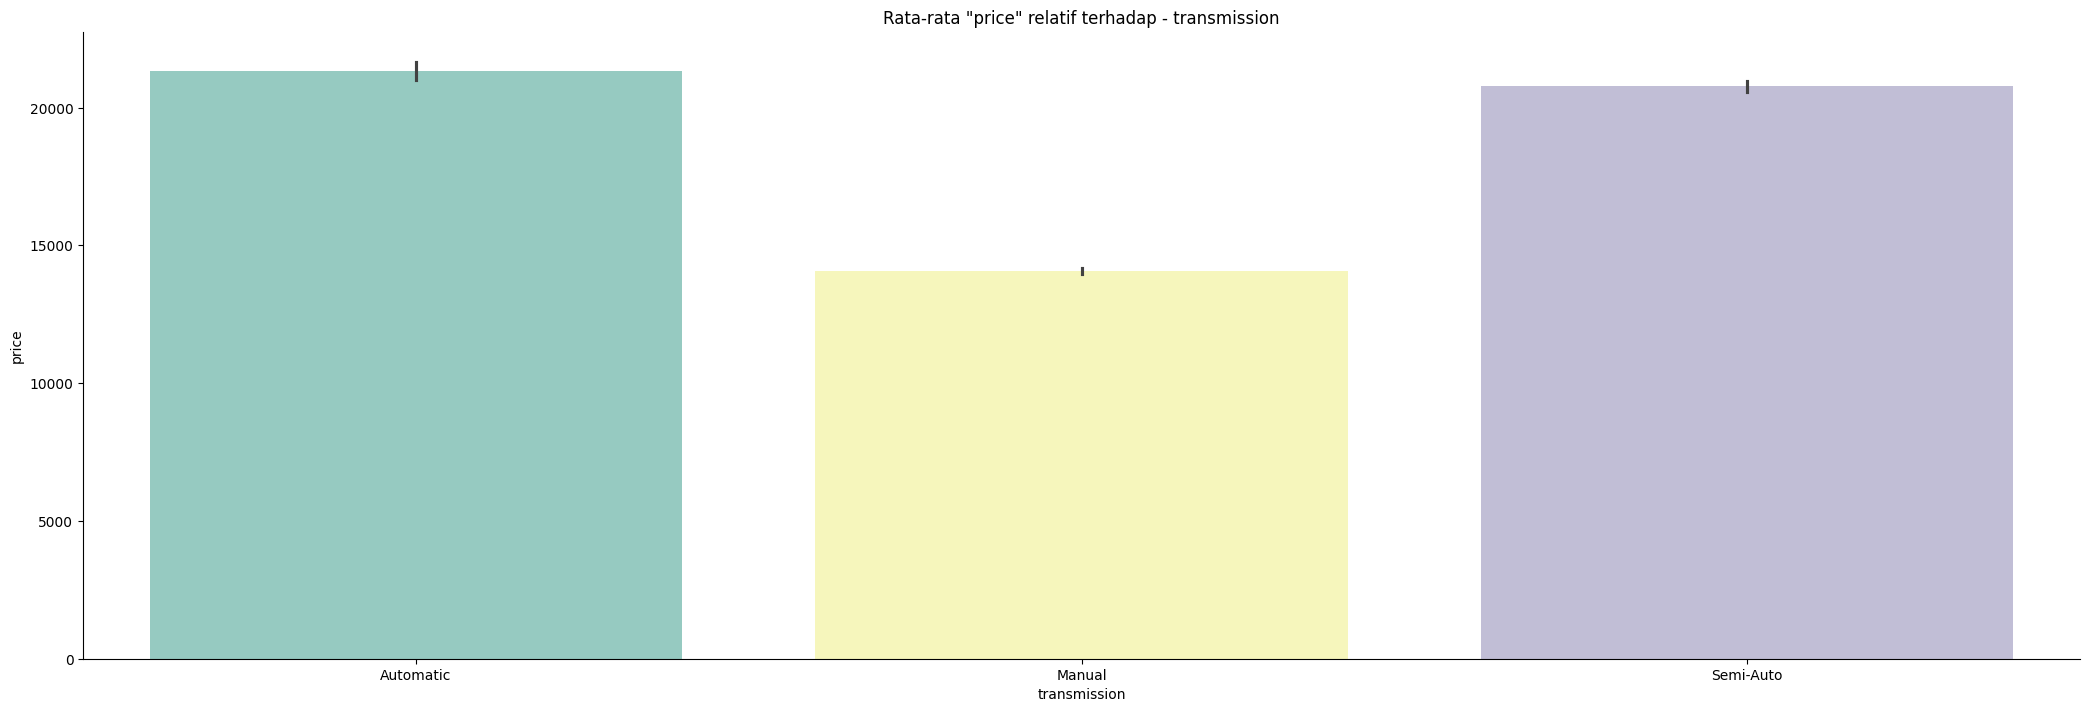

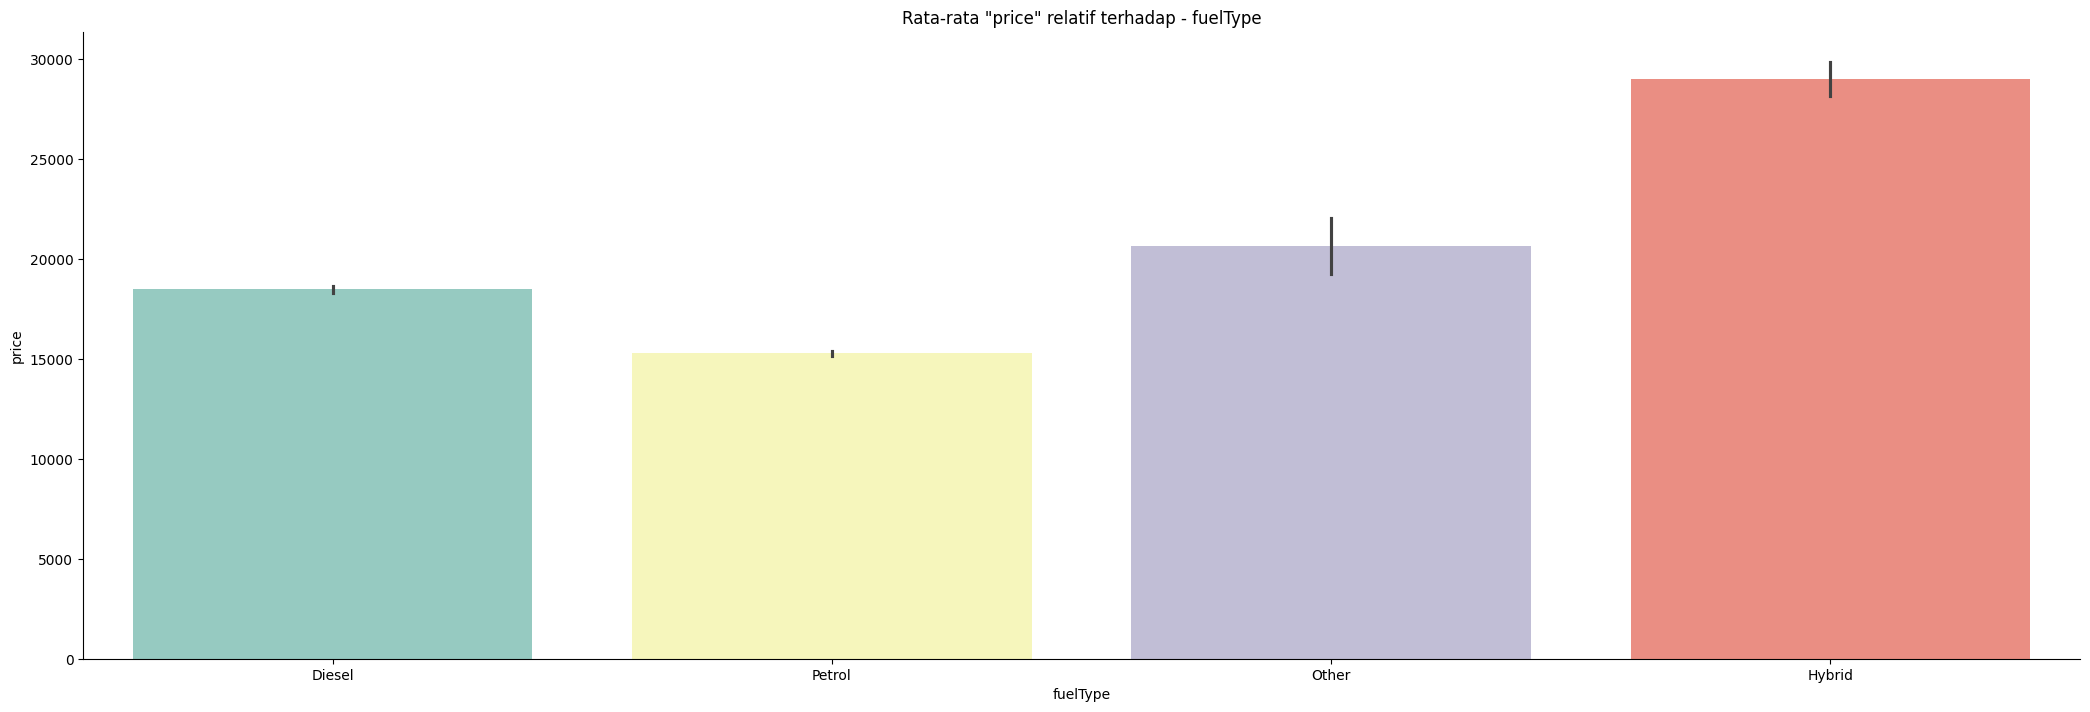

In [362]:
kategori_features = car.select_dtypes(include='object').columns.to_list()
for col in kategori_features:
    sns.catplot(x=col, y='price', kind='bar', dodge=False, height = 7, aspect= 3, data=car, palette='Set3', hue=col)
    plt.title('Rata-rata "price" relatif terhadap - {}'.format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:
<ul>
    <li>Pada fitur ‘model’, rata-rata harga cenderung berbeda. Rentangnya berada antara 500 hingga 30000. Grade tertinggi yaitu grade up memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur model memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.</li>
    <li>Pada fitur ‘transmission’, transmission manual merupakan transmission yang paling rendah dan harganya pun rendah dibanduing dengan transmission automatic dan semi-auto, hal ini berarti bahwa fitur transmission memiliki pengaruh yang tinggi terhadap harga</li>
    <li>Pada fitur ‘fuelType’, secara umum, fueltype yang gradenya lebih tinggi memiliki harga yang tinggi juga, hal ini berati bahwa fitur fuelType memiiki pengaruh yang tinggi terhadap harga.</li>
    <li>Kesimpulan akhir, fitur kategori memiliki pengaruh yang tinggi terhadap harga.</li>
</ul>

**Numerikal**  
mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr()

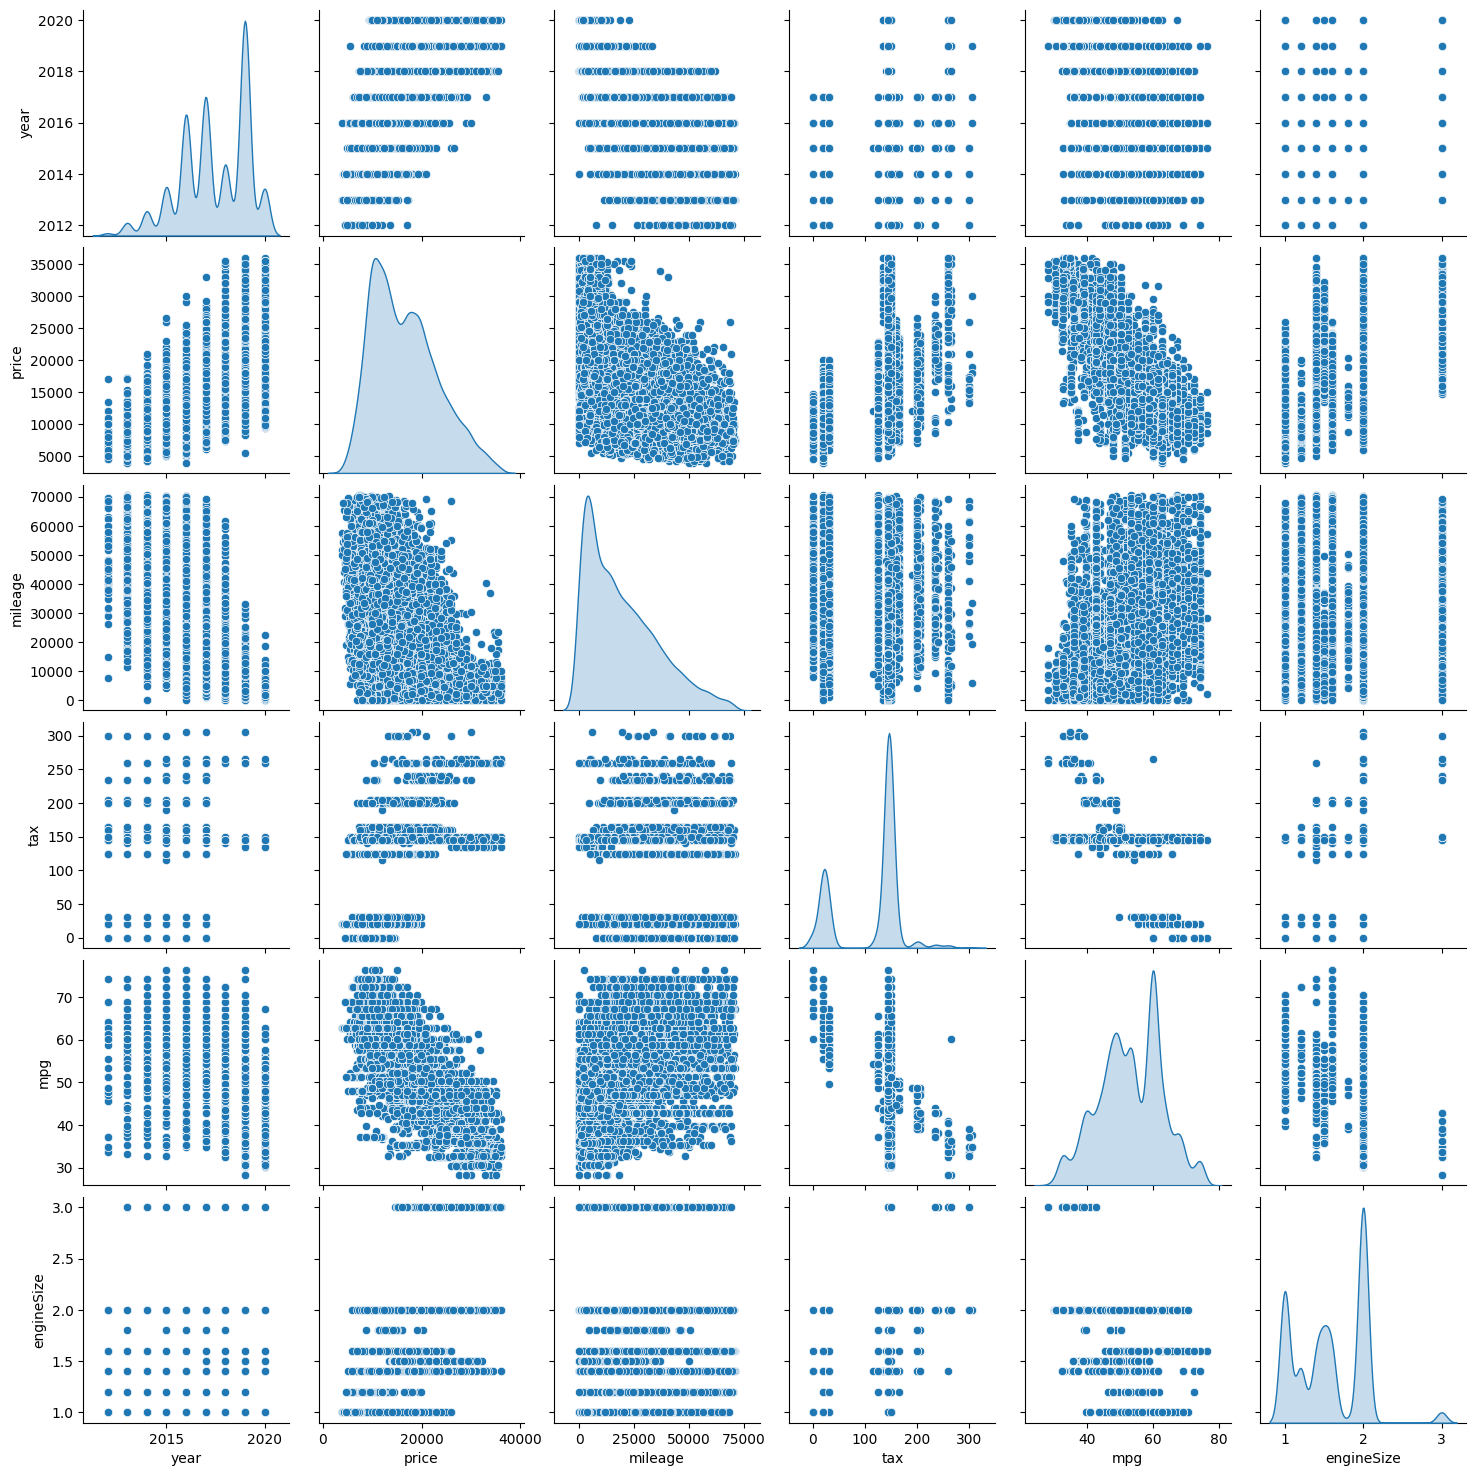

In [363]:
sns.pairplot(car, diag_kind='kde')

pada fitur numerikal diatas dapat dilihat bahwa tidak ada yang memiliki korelasi yang tinggi terhadap fitur 'price'

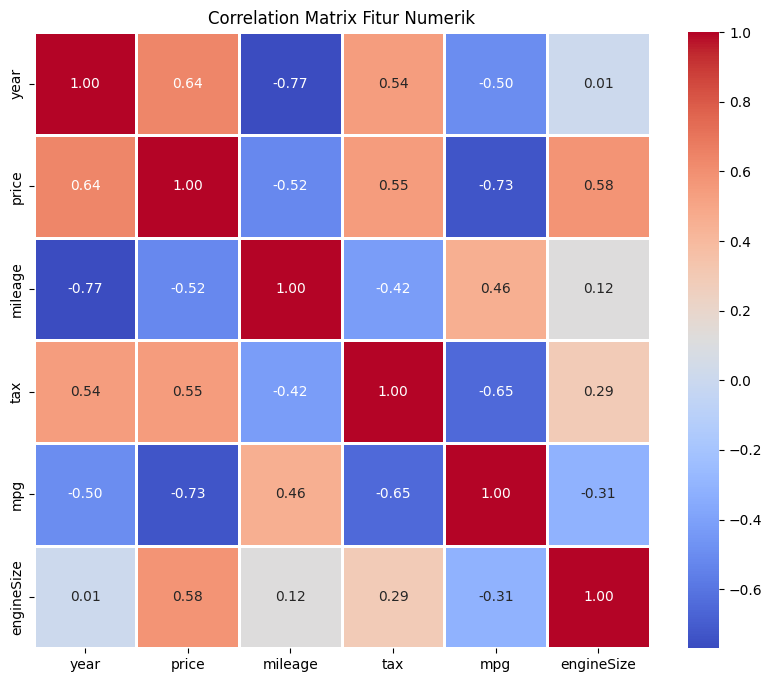

In [364]:
# buat correlation matrix fitur numerik
corr = car[numerik].corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2, cbar=True, square=True)
plt.title('Correlation Matrix Fitur Numerik')
plt.show()





fitur ‘tax’, ‘year, dan ‘engineSize’ memiliki skor korelasi yang sedang (di antara 0.5 - 0.6) dengan fitur target ‘price’. Artinya, fitur 'price' berkorelasi sedang dengan ketiga fitur tersebut. Sementara itu, fitur ‘mileage’  dan 'mpg' memiliki korelasi yang sangat kecil (antara -5 hingga -7). Sehingga, fitur tersebut dapat di-drop.

In [365]:
car.drop(['mileage'], axis=1)
car.drop(['mpg'], axis=1)
car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


### DATA PREPARATION 
Menggunakan oneHotEncoder

In [366]:
car = pd.concat([car, pd.get_dummies(car['model'], prefix='model', drop_first=True)], axis=1)
car = pd.concat([car, pd.get_dummies(car['transmission'], prefix='transmission', drop_first=True)], axis=1)
car = pd.concat([car, pd.get_dummies(car['fuelType'], prefix='fuelType', drop_first=True)], axis=1)
car.drop(['model','transmission','fuelType'], axis=1, inplace=True)
car.head()

,year,price,mileage,tax,mpg,engineSize,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,...,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2019,25000,13904,145,49.6,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2019,26883,4562,145,49.6,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2019,20000,7414,145,50.4,2.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,2019,33492,4825,145,32.5,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2019,22900,6500,150,39.8,1.5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


**reduksi dimensi dengan PCA**

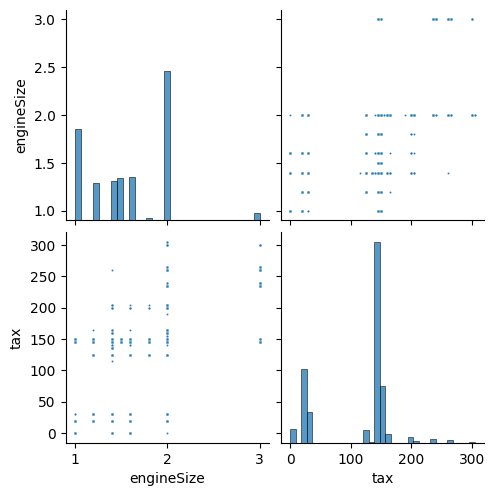

In [367]:
sns.pairplot(car[['engineSize','tax']], plot_kws={'s':2})

Aplikasikan class PCA

In [368]:
pca = PCA(n_components=2, random_state=123)
pca.fit(car[['engineSize','tax']])
princ_comp = pca.transform(car[['engineSize','tax']])

Mengetahui informasi dari ke dua komponen

In [369]:
pca.explained_variance_ratio_.round(3)

array([1., 0.])

Membuat fitur bernama 'fitur'

In [370]:
pca = PCA(n_components=1, random_state=123)
pca.fit(car[['engineSize','tax']])
car['fitur'] = pca.transform(car.loc[:, ('engineSize','tax')]).flatten()
car.drop(['engineSize','tax'], axis=1, inplace=True)
car.head()


,year,price,mileage,mpg,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,...,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,fitur
0,2019,25000,13904,49.6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32.362484
1,2019,26883,4562,49.6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32.362484
2,2019,20000,7414,50.4,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,32.362484
3,2019,33492,4825,32.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,32.362484
4,2019,22900,6500,39.8,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,37.361431


**TRAIN TEST SPLIT**

Membagi data latih dan data uji

In [371]:
X = car.drop(['price'], axis=1)
y = car['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 14060
Total # of sample in train dataset: 12654
Total # of sample in test dataset: 1406


**STANDARISASI**

In [372]:
numerik = ['year','fitur']
scaler = StandardScaler()
scaler.fit(X_train[numerik])
X_train[numerik] = scaler.transform(X_train.loc[:, numerik])
X_train[numerik].head()


,year,fitur
14630,0.914008,0.531378
9813,0.914008,0.613560
1147,-0.245418,-1.852377
3572,0.914008,0.531395
10321,0.914008,0.613594


cek nilai mean dan standar deviasi  setelah proses standarisasi

In [373]:
X_train[numerik].describe().round(4)

,year,fitur
count,12654.0000,12654.0000
mean,0.0000,0.0000
std,1.0000,1.0000
min,-3.1440,-1.8524
25%,-0.8251,-1.3592
50%,-0.2454,0.5314
75%,0.9140,0.5314
max,1.4937,3.1617


## Modeling

Proses modeling yang saya lakukan pada data ini adalah dengan menggabungkan tiga algoritma machine learning kemudian dicari performa yang paling baik dari ketiga algoritma machine learning tersebut.



## Model Development dengan K-Nearest Neighbor

persiapan dataframe untuk analisis model

In [374]:
models = pd.DataFrame(index=['train_mse','test_mse'],
                    columns=['KNN', 'RandomForest', 'Boosting'])

In [375]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

## Model Development dengan Random Forest

In [376]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=45, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Model Development dengan Boosting Algorithm

In [377]:
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)
X_test[numerik] = X_test[numerik].astype(float)  # Konversi ke float sebelum transformasi
X_test.loc[:, numerik] = pd.DataFrame(
    scaler.transform(X_test[numerik]), 
    columns=numerik, 
    index=X_test.index
)


In [378]:
# save to joblib 
import joblib
joblib.dump(knn, 'knn.pkl')
joblib.dump(RF, 'RF.pkl')
joblib.dump(boosting, 'boosting.pkl')





['boosting.pkl']

## Evaluation

Evaluasi metrik yang digunakan untuk mengukur kinerja model adalah metrik mse (Mean Squared Error), karena kasus yang saya pilih merupakan kasus regresi.

MSE pada dasarnya mengukur kesalahan kuadrat rata-rata dari prediksi kita. Untuk setiap poin, dia menghitung selisih kuadrat antara prediksi dan target kemudian merata-rata nilai-nilai itu.

makin tinggi nilai ini, makin buruk modelnya. Nilai MSE tidak pernah negatif, karena kita menguadratkan kesalahan prediksi individu sebelum menjumlahkannya, tetapi akan menjadi nol untuk model yang sempurna.

Keuntungan: Berguna jika kita memiliki nilai tak terduga yang harus kita pedulikan. Nilai sangat tinggi atau rendah yang harus kita perhatikan.<br>

Kerugian: Jika kita membuat satu prediksi yang sangat buruk, kuadrat akan membuat kesalahan lebih buruk dan itu mungkin membuat metrik cenderung melebih-lebihkan keburukan model. Itu adalah perilaku yang sangat bermasalah jika kita memiliki data yang noisy (yaitu, data yang karena alasan apa pun tidak sepenuhnya dapat diandalkan) bahkan model "sempurna" mungkin memiliki MSE tinggi dalam situasi itu, sehingga menjadi sulit untuk menilai seberapa baik model sedang melakukan. Di sisi lain, jika semua kesalahan kecil, atau lebih tepatnya, lebih kecil dari 1, dari efek sebaliknya dirasakan: kita dapat meremehkan keburukan model.

formula dari metrik MSE adalah sebagai berikut

![formula metrik MSE](https://raw.githubusercontent.com/onedayxzn/submission_file/master/2021071619431112f1106e20559e77c855cea11d1b1479.jpeg?token=AOCWOZU6LNKVCXTMU7HOR3DBLVCWU)

keterangan : <br>
N : Jumlah dataset. <br>
yi = nilai sebenarnya.<br>
y_pred = nilai prediksi.<br>

Evaluasi ketiga model dengan matrix mse

In [379]:
mse = pd.DataFrame(columns=['train','test'],index=['KNN','RF','boosting'])
model_dict = {'KNN':knn, 'RF':RF, 'boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
mse


,train,test
KNN,18909.53652,24770.913094
RF,659.902013,2148.663843
boosting,10473.497811,10655.358872


menampilkan plot metrix dengan bar chart

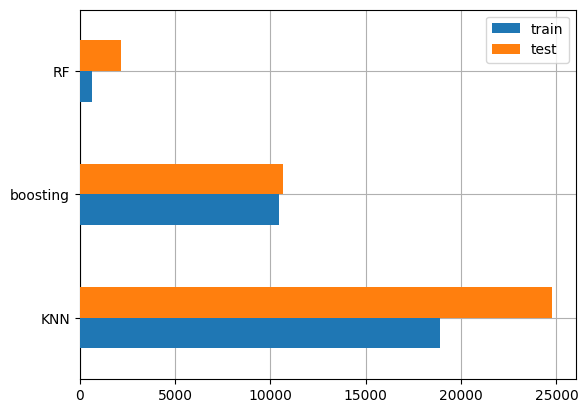

In [380]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar diatas memperlihatkan bahwa KNN memberikan nilai error yang paling kecil. maka model KNN dipilih sebagai model terbaik untuk melakukan prediksi harga mobil

Berikut adalah kode untuk melihat hasil predikisi dari masing-masing model

In [390]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_boosting
10808,20290,20719.3,19465.6,20387.6


dapat dilihat diatas bahwa prediki dengan KNN memberikan hasil yang paling mendekati dibanding dengan kedua model lainnya

## PREDICTION

In [ ]:
import joblib
import pandas as pd

model_knn = joblib.load('knn.pkl')

input_year = input('Masukkan tahun mobil : ')
input_model = input('Masukkan model mobil : ')
input_transmission = input('Masukkan transmisi mobil : ')
input_fuelType = input('Masukkan jenis bahan bakar mobil : ')
input_engineSize = input('Masukkan ukuran mesin mobil : ')
input_tax = input('Masukkan pajak mobil : ')
input_mpg = input('Masukkan konsumsi bahan bakar mobil : ')
input_mileage = input('Masukkan jarak tempuh mobil : ')

input_data = pd.DataFrame({
    'model': [input_model],
    'year': [input_year],
    'transmission': [input_transmission],
    'mileage': [input_mileage],
    'fuelType': [input_fuelType],
    'tax': [input_tax],
    'mpg': [input_mpg],
    'engineSize': [input_engineSize]
})

# Encode categorical variables
input_data = pd.get_dummies(input_data, columns=['model', 'transmission', 'fuelType'], drop_first=True)

# Add missing columns with default value 0
for col in X_train.columns:
    if col not in input_data.columns:
        input_data[col] = 0

# Ensure the order of columns matches the training data
input_data = input_data[X_train.columns]

# Scale numerical variables
numerik = ['year', 'fitur']
input_data[numerik] = scaler.transform(input_data[numerik])

price = model_knn.predict(input_data)[0]
print(f'Harga mobil bekas tersebut adalah ${price:.2f}')















Harga mobil bekas tersebut adalah $9009.00
